# Machine Learning: Lab 1
## Leerling :Thibaut Beck
## Introduction
TA: Bryan Coulier (bryan.coulier@kuleuven.be)

## 1) Setup
Install Anaconda (GUI):
https://www.anaconda.com/download

Create a new environment and install numpy, matplotlib, pandas, scikit-learn and seaborn.

Start jupyter lab.

Note: if you prefer a minimal installation, install miniconda (CLI):
https://docs.conda.io/projects/conda/en/latest/user-guide/install/windows.html

After opening a miniconda cli, do the following:

Create new conda env
```
conda create -n machine_learning python=3.9
```

Install necessary packages
```
conda install numpy matplotlib pandas scikit-learn seaborn jupyter
```

Run jupyter-notebook
```
jupyter notebook
```

## 2) Data preprocessing & analysis
Useful links:
- https://pandas.pydata.org/
- https://numpy.org/
- https://seaborn.pydata.org/
- https://matplotlib.org/
- https://scikit-learn.org/stable/datasets/toy_dataset.html

importeren van de benodigde biliotheken.

In [488]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris , load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the iris dataset from sklearn, display the data and target shape.

inladen van de dataset

In [489]:
iris = load_iris()

weergeven van de dataset

In [490]:
print("Data shape:", iris.data.shape)
print("Target shape:", iris.target.shape)

Data shape: (150, 4)
Target shape: (150,)


Convert the dataset to a pandas dataframe (data + target) and print the first 5 rows.

converteren van de dataset naar een pandas dataframe

In [491]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target


Eerste 5 rijen afdrukken

In [492]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Use seaborn to create a pairplot of the features (use target as hue).

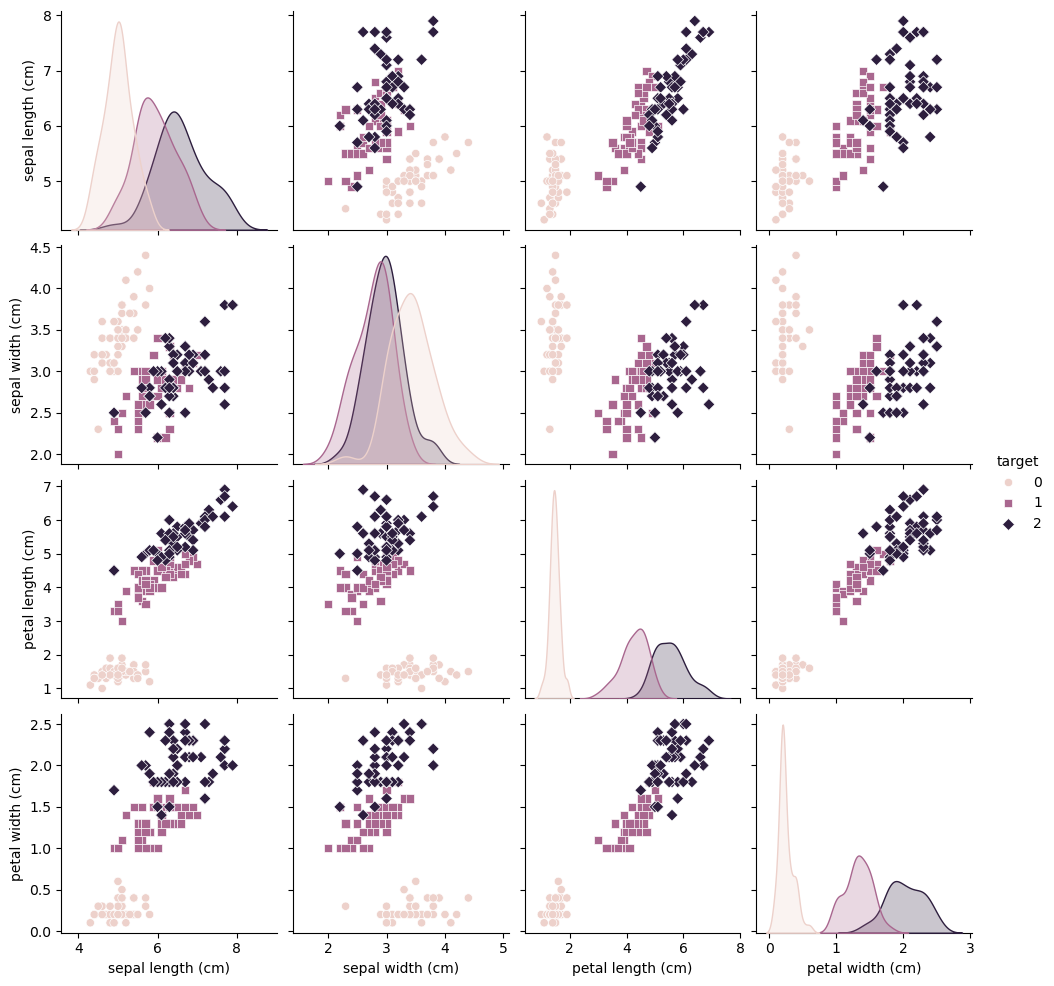

In [493]:
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.show()

Use seaborn to create a violinplot of sepal length by species.

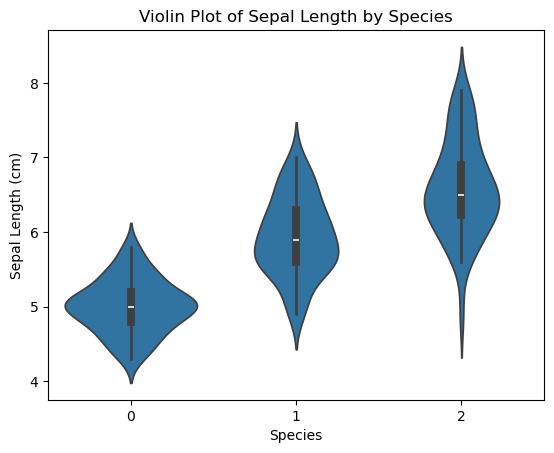

In [494]:
sns.violinplot(x='target', y='sepal length (cm)', data=iris_df)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

Use Matplotlib to create a histogram of petal width, use a bin size of 10.

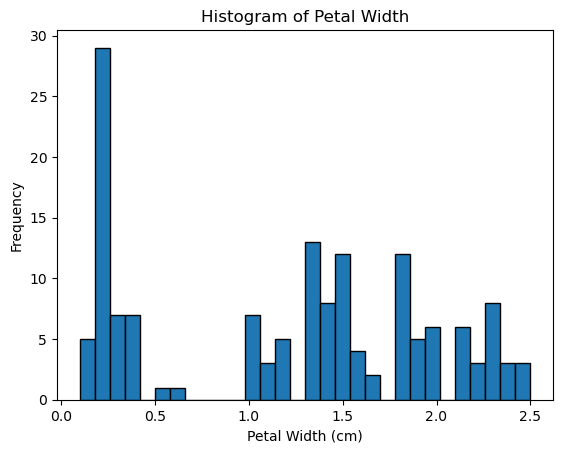

In [495]:
plt.hist(iris_df['petal width (cm)'], bins=30, edgecolor='black')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

Load the breast cancer dataset from sklearn as a dataframe and display the feature-names.

inladen van de dataset

In [496]:
breast_cancer = load_breast_cancer()

converteren van de dataset naar een pandas dataframe

In [497]:
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

weergeven van de 'feature name'

In [498]:
print("Feature names:", breast_cancer.feature_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Calculate statistics (count, mean, standard-deviation...) for each feature in the breast cancer dataset and plot histograms for each feature.

statistieken berekenen en uitprinten voor de borst kanker dataset

In [499]:
statistics = breast_cancer_df.describe()
print(statistics)

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

plotten van de bijhorende histogrammen

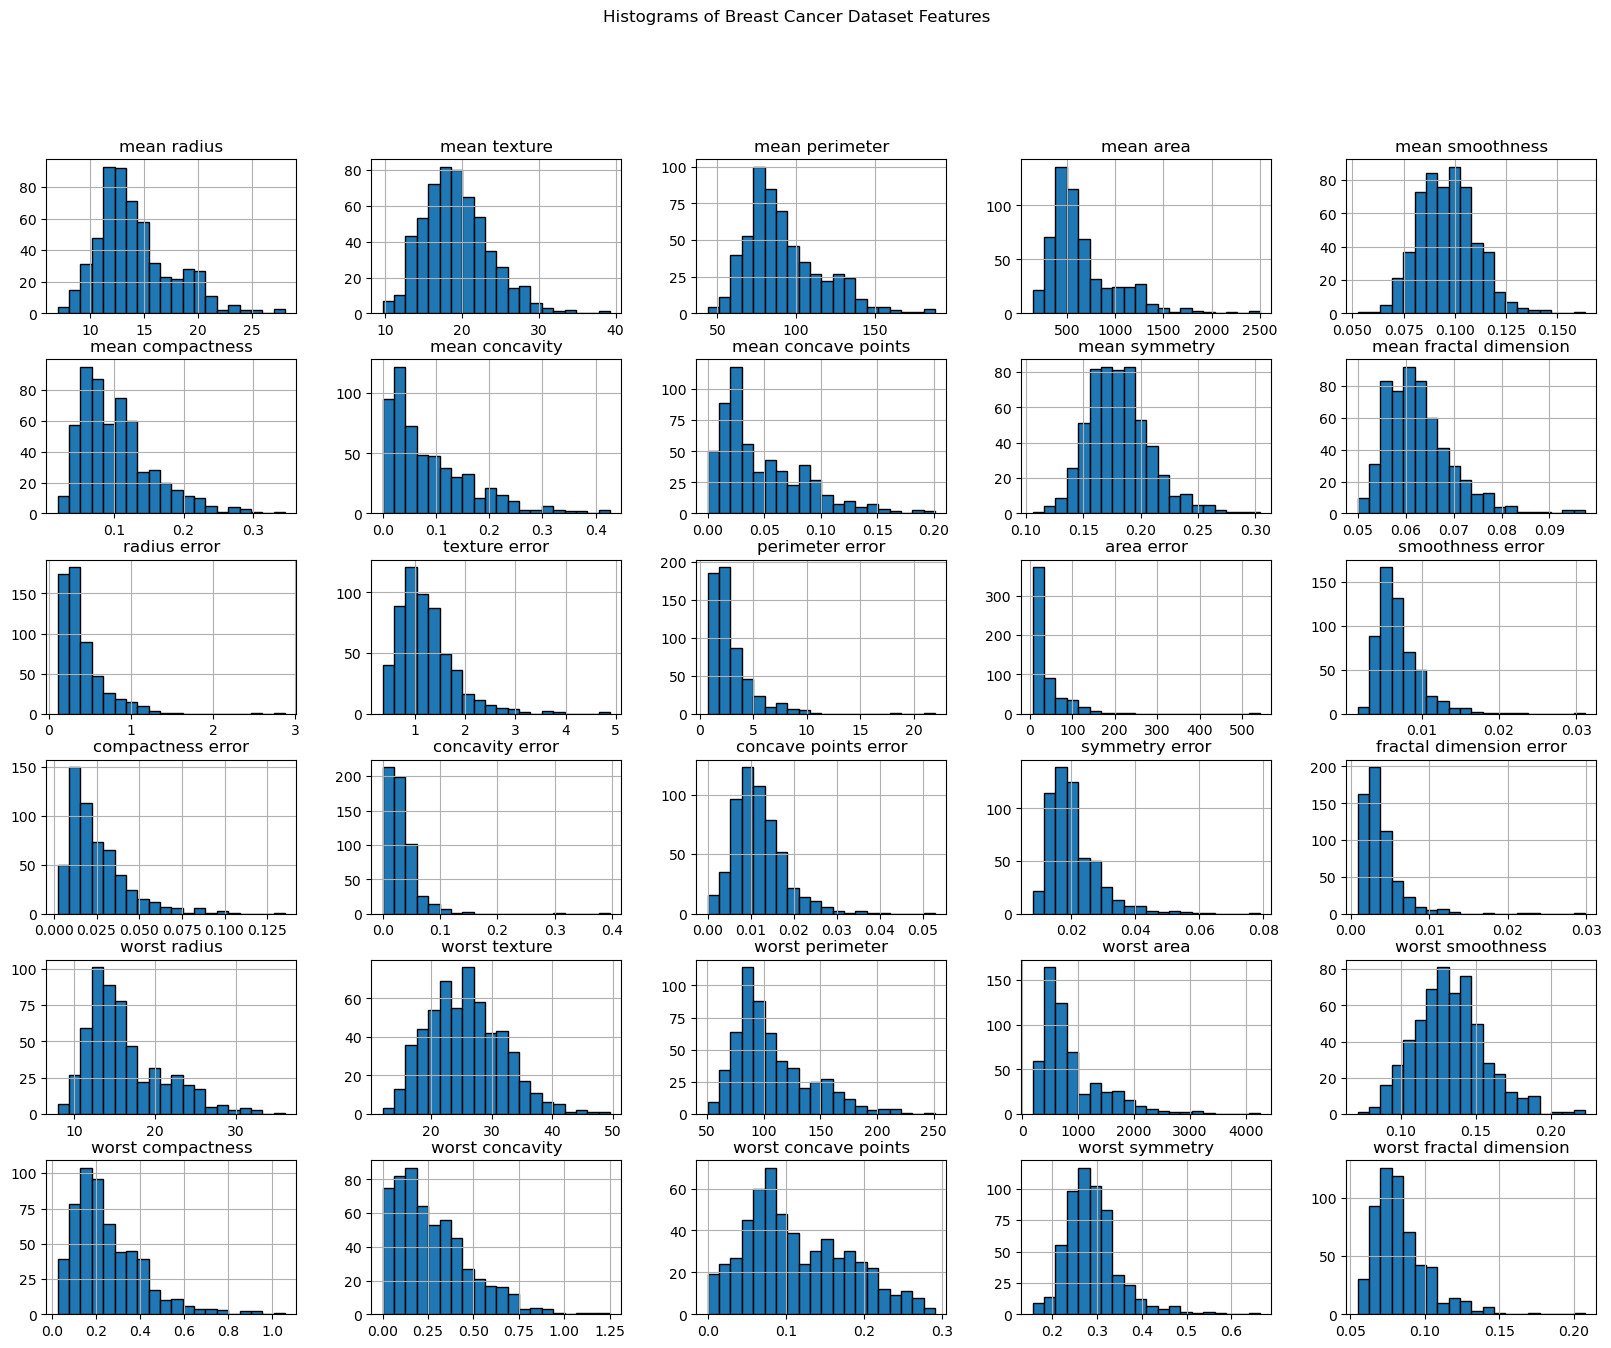

In [500]:
breast_cancer_df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Breast Cancer Dataset Features')
plt.show()

Create a correlation matrix of the features of the breast cancer dataset with seaborn.

correlatie matrix maken 

In [501]:
correlation_matrix = breast_cancer_df.corr()

correlatie aande hand van seaborn plotten.

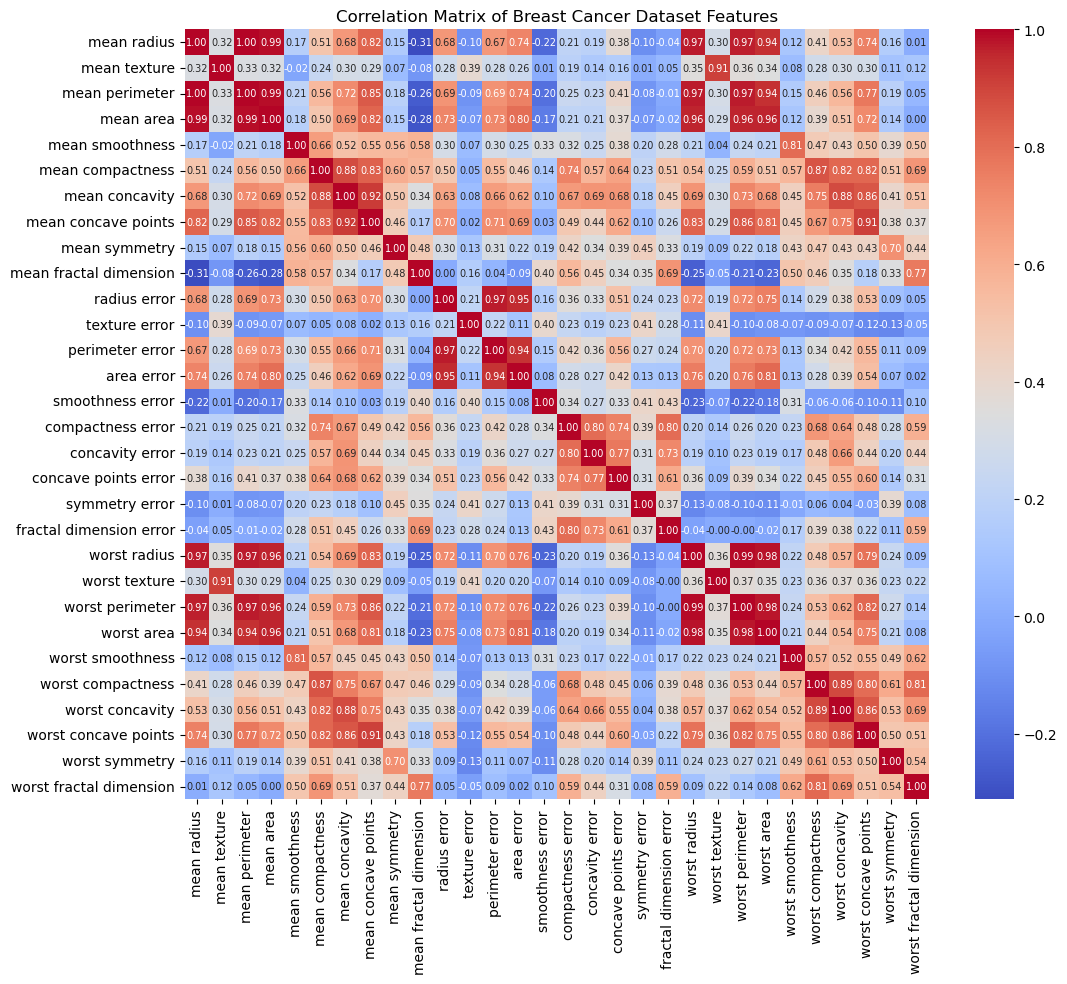

In [502]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm' ,annot_kws={"size": 7})
plt.title('Correlation Matrix of Breast Cancer Dataset Features')
plt.show()

Create a boxplot of the mean radius in function of the target (benign or malignant tumors).


breast_cancer.target bevat de doelvariabelen, oftewel labels (0 of 1), die aangeven of een tumor goedaardig (benign) of kwaadaardig (malignant) is.
breast_cancer.target_names bevat de corresponderende tekstlabels, namelijk ['malignant', 'benign'].
breast_cancer.target_names[breast_cancer.target] zet aan de hand van de numerieke waarden van de target (0/1) om in de bijhorende tekstwaarden.
aan de hand hiervan weet men of het een kankersoort is of niet.
dit wordt in een kolom bewaart in het breast_cancer_df.

In [503]:
print(breast_cancer.target)
print("-------------------")
print(breast_cancer.target_names[breast_cancer.target])
breast_cancer_df['target_names'] = breast_cancer.target_names[breast_cancer.target]
print("-------------------")
print(breast_cancer_df.head())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Maak een boxplot van de gemiddelde straal als functie van de doelvariabele.

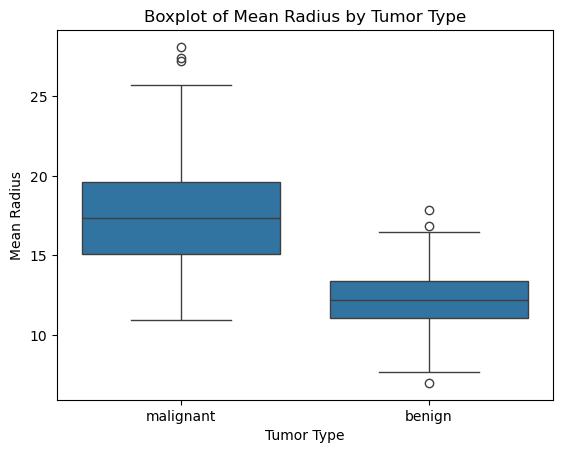

In [504]:
sns.boxplot(x='target_names', y='mean radius', data=breast_cancer_df)
plt.xlabel('Tumor Type')
plt.ylabel('Mean Radius')
plt.title('Boxplot of Mean Radius by Tumor Type')
plt.show()

## Problem 1: Customers

Given a dataset containing information about customers of a store, the task is to analyze the data and create visualizations to understand the customers better. The dataset contains the following columns:

- "Age": the age of the customer.
- "Gender": the gender of the customer.
- "Annual Income (Euro)": the annual income of the customer.
- "Spending Score (1-100)": the spending score of the customer.

### Tasks:

1) Load the dataset into a pandas dataframe.
2) Print the first 5 rows of the dataset.
3) Check for missing values in the dataset and handle them appropriately by replacing them with the mean value.
4) Check the distribution of the variables using histograms and boxplots.
5) Calculate the correlation between the variables and visualize the correlation by using a Heat map.
6) Create a scatter plot of "Annual Income (Euro)" vs "Spending Score (1-100)" and color the points based on gender.
7) Create a bar plot to show the count of male and female customers.


Note: use the following code to generate a sample dataframe for the task:

```Python
import pandas as pd
import numpy as np

np.random.seed(0)

# Generate random values for annual income and spending score
n = 100
income_mean = 60
income_sd = 10
spending_mean = 50
spending_sd = 10

income = np.random.normal(income_mean, income_sd, n)
spending = np.random.normal(spending_mean, spending_sd, n)

# Add some noise to the spending variable
noise = np.random.normal(0, 5, n)
spending += noise

# Create a correlation between income and spending
corr = 0.8
cov = corr * income_sd * spending_sd
income, spending = np.random.multivariate_normal([income_mean, spending_mean], [[income_sd**2, cov], [cov, spending_sd**2]], n).T


data = {"Age": np.random.randint(18, 65, size=(n,)),
        "Gender": np.random.choice(["Male", "Female"], size=(n,)),
        "Annual Income (Euro)": income,
        "Spending Score (1-100)": spending}

```

Hieronder staat het script voor de initialisatie van de dataset

In [505]:
import pandas as pd
import numpy as np

np.random.seed(0)

# Generate random values for annual income and spending score
n = 100
income_mean = 60
income_sd = 10
spending_mean = 50
spending_sd = 10

income = np.random.normal(income_mean, income_sd, n)
spending = np.random.normal(spending_mean, spending_sd, n)

# Add some noise to the spending variable
noise = np.random.normal(0, 5, n)
spending += noise

# Create a correlation between income and spending
corr = 0.8
cov = corr * income_sd * spending_sd
income, spending = np.random.multivariate_normal([income_mean, spending_mean], [[income_sd**2, cov], [cov, spending_sd**2]], n).T


data = {"Age": np.random.randint(18, 65, size=(n,)),
        "Gender": np.random.choice(["Male", "Female"], size=(n,)),
        "Annual Income (Euro)": income,
        "Spending Score (1-100)": spending}


De dataset in een pandas dataframe laden

In [506]:
customers_df = pd.DataFrame(data)

Uitprinten van de eerste 5 rijen van de dataset

In [507]:
print(customers_df.head())

   Age  Gender  Annual Income (Euro)  Spending Score (1-100)
0   20  Female             67.151332               67.638272
1   37  Female             63.271915               48.970090
2   21  Female             55.135059               42.221211
3   31    Male             76.916582               58.399193
4   29  Female             53.922905               42.913674


 fillna vult ontbrekende waarden in customers_df aan met het gemiddelde van de numerieke kolommen, waarbij de wijzigingen direct in de dataframe worden doorgevoerd.

In [508]:
customers_df.fillna(customers_df.mean(numeric_only=True), inplace=True)


De distributie bekijken aan de hand van histogrammen en boxplots

1. aan de hand van histogrammen.

customers_df.hist() , is een panda's methode die authomatisch alle numerieke kolommen in de dataframe maakt en voor elke kolom een appart histogram maakt.

bins : waarden in het aantal intervallen onderverdelen

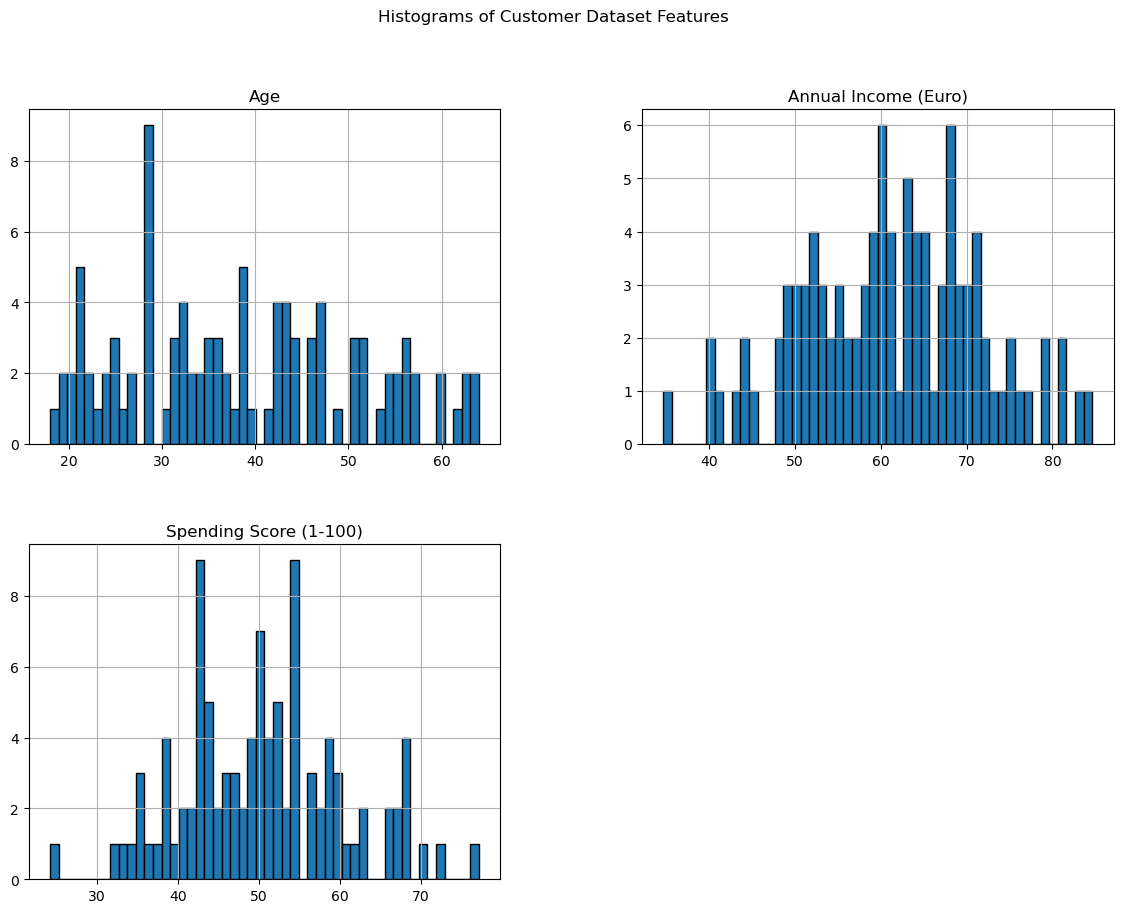

In [509]:
customers_df.hist(bins=50, figsize=(14, 10), edgecolor='black')
plt.suptitle('Histograms of Customer Dataset Features')
plt.show()

2. aan de hand van boxplots

Hiervoor is geen ingebouwde functie, waardoor een enumeratie over alle kolommen nodig is.

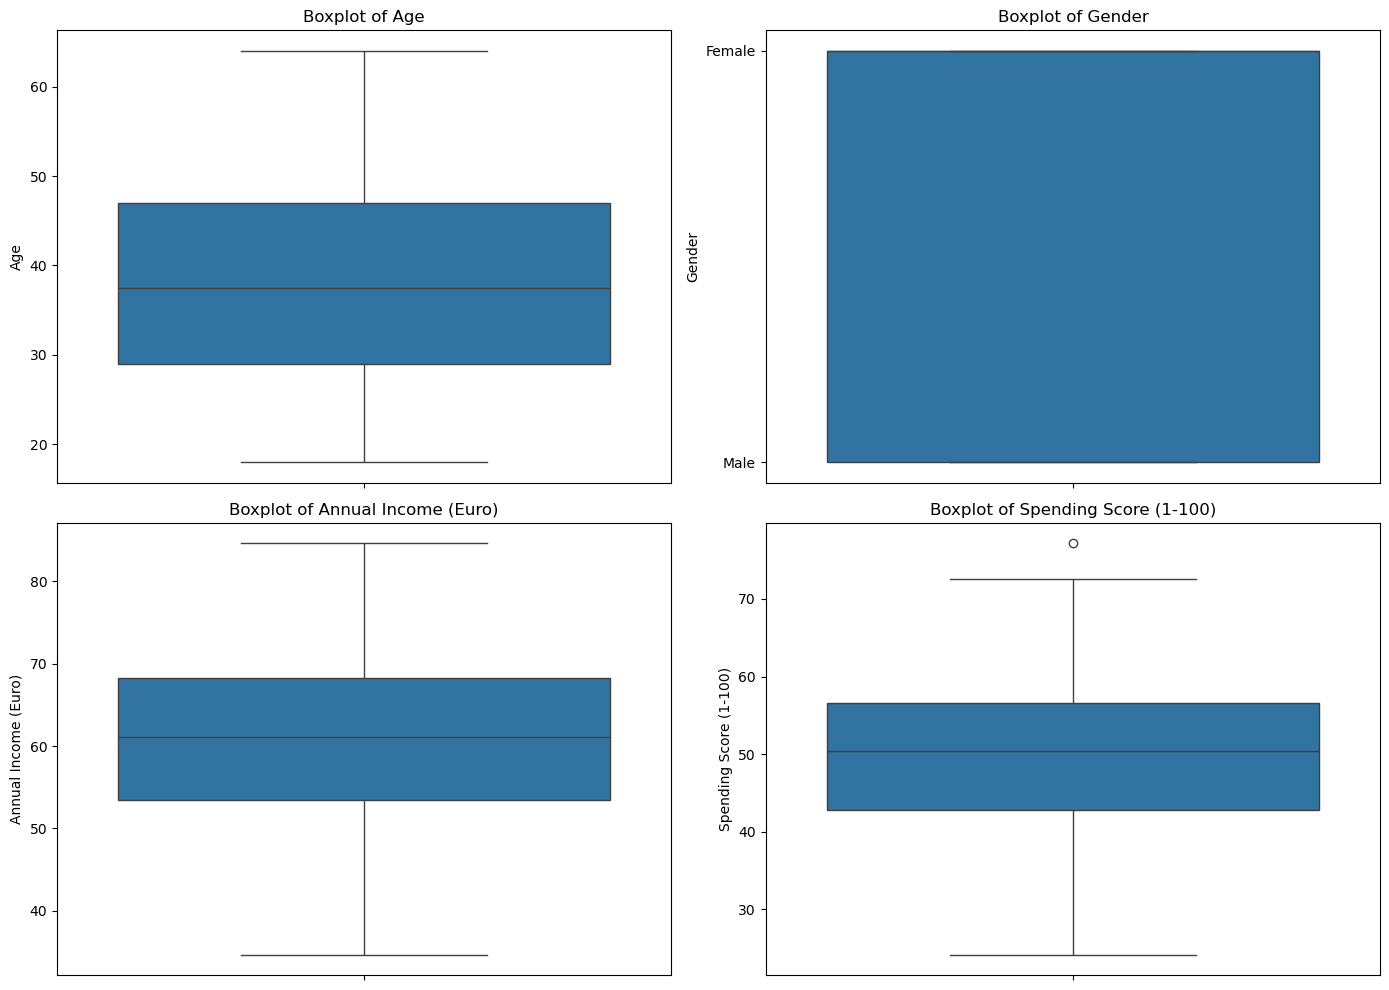

In [510]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(customers_df.columns):
        plt.subplot(2, 2, i +1) #i starts from 0 but subplot starts from 1
        sns.boxplot(y=customers_df[column])
        plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

het berekenen van de corelatie tussen de variabelen en dit aan de hand van een heatmap visualiseren

Deze code selecteert de numerieke kolommen uit customers_df en berekent vervolgens de correlatiematrix, waarin de onderlinge correlaties tussen deze variabelen worden weergegeven.
select_dtypes(include=[np.number]): Selecteert alleen de kolommen met numerieke waarden.
.corr(): Berekent de correlatiecoëfficiënten tussen deze numerieke kolommen

In [511]:
correlation_matrix_customers = customers_df.select_dtypes(include=[np.number]).corr()

visualistatie van de correlatie matrix

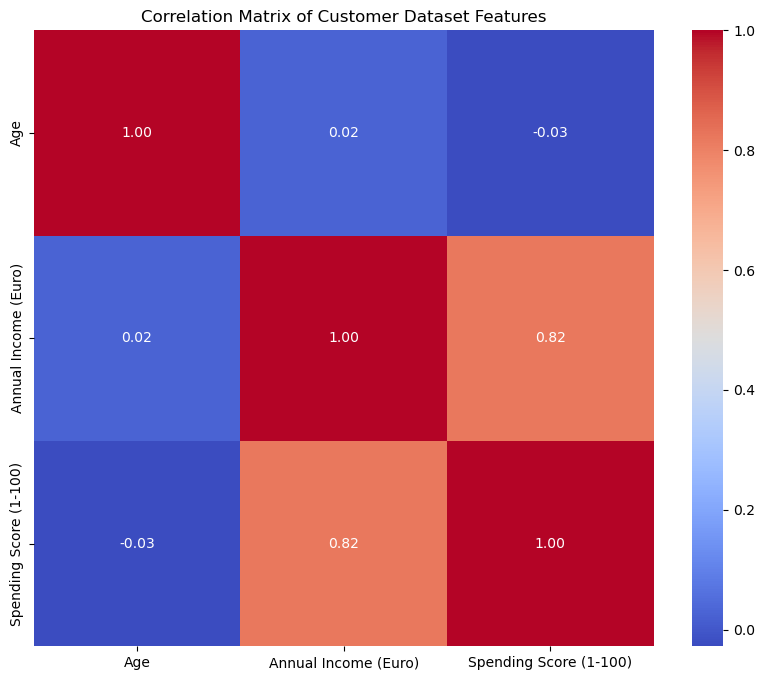

In [512]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_customers, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Customer Dataset Features')
plt.show()

scatterplot van het gemiddlede jaarlijkse incomen in euro ten opzichte van de spendeerscore en kleurpunten op basis van gender

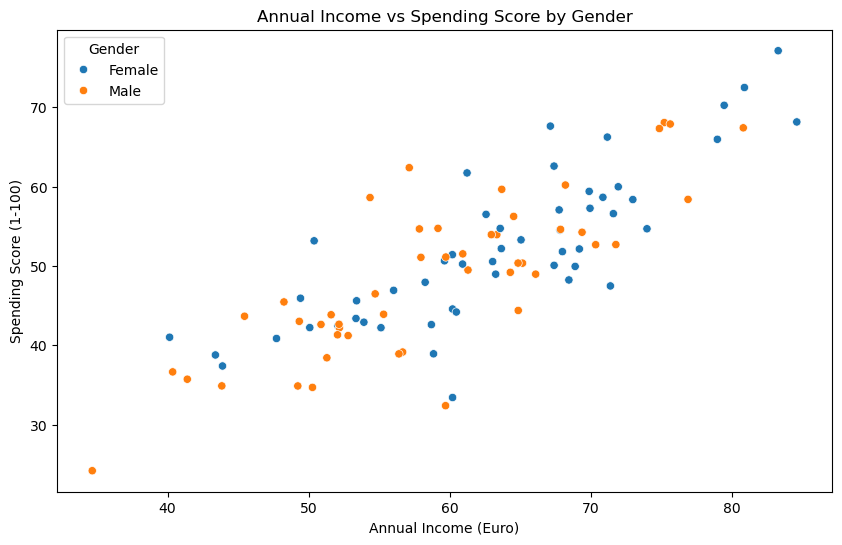

In [513]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customers_df, x='Annual Income (Euro)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (Euro)')
plt.ylabel('Spending Score (1-100)')
plt.show()

een bar plot voor het aantal mannelijke en vrouwelijke klanten

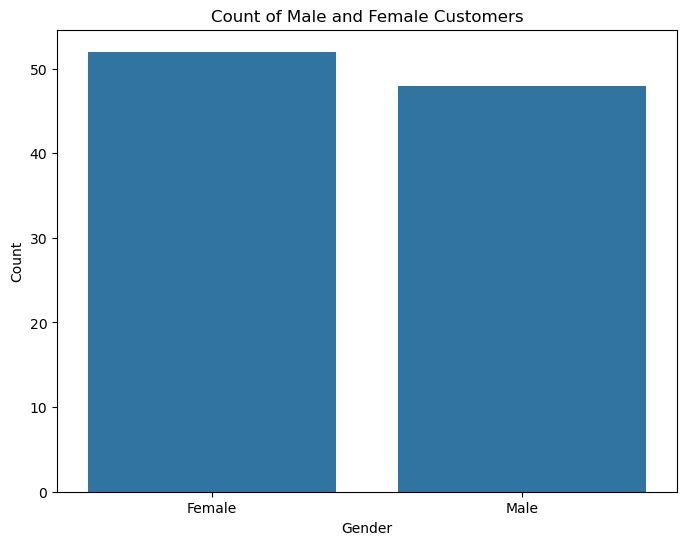

In [514]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='Gender')
plt.title('Count of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Problem 2: Housing
Using the Boston Housing dataset (Housing.csv), perform a comprehensive statistical analysis to understand the characteristics and relationships within the data. The dataset contains various features of houses in Boston neighborhoods, including crime rates, environmental factors, and housing values. A detailed description of the features can be found at: http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Your task is to:
1. Analyze the quality and characteristics of the dataset
2. Investigate relationships between features
3. Study the distribution of housing values and other relevant features
4. Prepare the data for potential modeling tasks
5. Present your findings with appropriate visualizations and statistical evidence to support your conclusions. Consider what preprocessing steps would be necessary for a machine learning application.

Note: Think carefully about which statistical methods and visualizations would be most appropriate for understanding this dataset. Explain each method or process in detail and justify your choices.
A very vague and general description of the used methods is not sufficient. 
Do not provide graphs without any explanation or analysis.

Your critical and analytical thinking is more important than the provided solution.

0. Laad de dataset

In [515]:
file_path = "Housing.csv"  
df = pd.read_csv(file_path)

1. Analyseer de kwaliteit en kenmerken van de dataset

In [516]:
def check_outliers(data):
    Q1 = data.quantile(0.25)  # Q1 (1e kwartiel) is het 25e percentiel van de dataset
    Q3 = data.quantile(0.75)  # Q3 (3e kwartiel) is het 75e percentiel van de dataset

    IQR = Q3 - Q1   # IQR (Interquartile Range) is het verschil tussen Q3 en Q1
    # outliers worden gedefinieerd als waarden buiten de range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    outlier_count = outliers.sum().sum() # tel het aantal outliers in de dataset
    if outlier_count > 0:
        print(f"\nEr zijn {outlier_count} afwijkende waarden in de dataset.")
    else:
        print("\nEr zijn geen hard afwijkende waarden in de dataset.")
def correlation_matrix(data):
    correlation = data.corr()
    print("\nCorrelatiematrix:")
    print(correlation)
def check_constant_columns(data):
    constant_columns = [col for col in data.columns if data[col].nunique() == 1] # kolommen met slechts 1 unieke waarde
    if constant_columns:
        print(f"\nDe volgende kolommen bevatten alleen constante waarden: {constant_columns}")
    else:
        print("\nEr zijn geen constante kolommen.")
def check_categorical_variables(data):
    categorical_columns = data.select_dtypes(include=['int64', 'object']).columns     # Selecteer kolommen die een 'int64' (gehele getallen) of 'object' (meestal tekst/categorisch) datatype hebben
    # Toon het aantal keren dat elke unieke waarde voorkomt in de kolom
    for col in categorical_columns: 
        print(f"\nWaarden voor {col}:")
        print(data[col].value_counts())
def plot_histograms(data):
    data.hist(bins=50, figsize=(15, 10)) # 50 bins voor een betere verdeling van de data te visualiseren
    plt.tight_layout()
    plt.show()
def check_missing_values(data):
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("\nGeen ontbrekende waarden in de dataset.")
    else:
        print("\nOntbrekende waarden per kolom:")
        print(missing_values)
def check_duplicates(data):
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print(f"\nEr zijn {duplicates} dubbele rijen in de dataset.")
    else:
        print("\nEr zijn geen dubbele rijen in de dataset.")


In [ ]:
print("Eerste vijf rijen van de dataset:")
print(df.head())

print("\nSamenvatting van de dataset:")
print(df.info())

print("\nStatistische beschrijving:")
print(df.describe())

check_missing_values(df)
check_duplicates(df)
check_outliers(df)
correlation_matrix(df)
check_constant_columns(df)
check_categorical_variables(df)
plot_histograms(df)



De dataset bevat gegevens over 506 huizen in verschillende gebieden, met 15 variabelen zoals criminaliteit (crim), de aanwezigheid van land (zn), industriële concentratie (indus), nabijheid van een rivier (chas), luchtvervuiling (nox), het gemiddelde aantal kamers per woning (rm), de leeftijd van de huizen (age), en de woningprijs (medv). De waarden in de dataset zijn continu, behalve de kolommen 'chas' en 'rad', die discrete categorieën bevatten. Er zijn geen ontbrekende waarden, dubbele rijen of constante kolommen. De dataset vertoont 343 afwijkende waarden en er is een sterk negatieve correlatie tussen de woningprijs (medv) en het percentage lage status (lstat), evenals een sterke positieve correlatie tussen de prijs en het aantal kamers per woning (rm). De kolommen 'tax' en 'rad' bevatten een breed scala aan waarden, met enkele veel voorkomende belastingen en radiowijken.

2. relaties tussen numerieke kenmerken in de dataset onderzoeken.

de correlatiematrix wordt hieronder afgebeeld in de vorm van een heat map, deze heatmap is een onderdriehoekse matrix. Hierdoor worden dubbele waarden verwijderd.

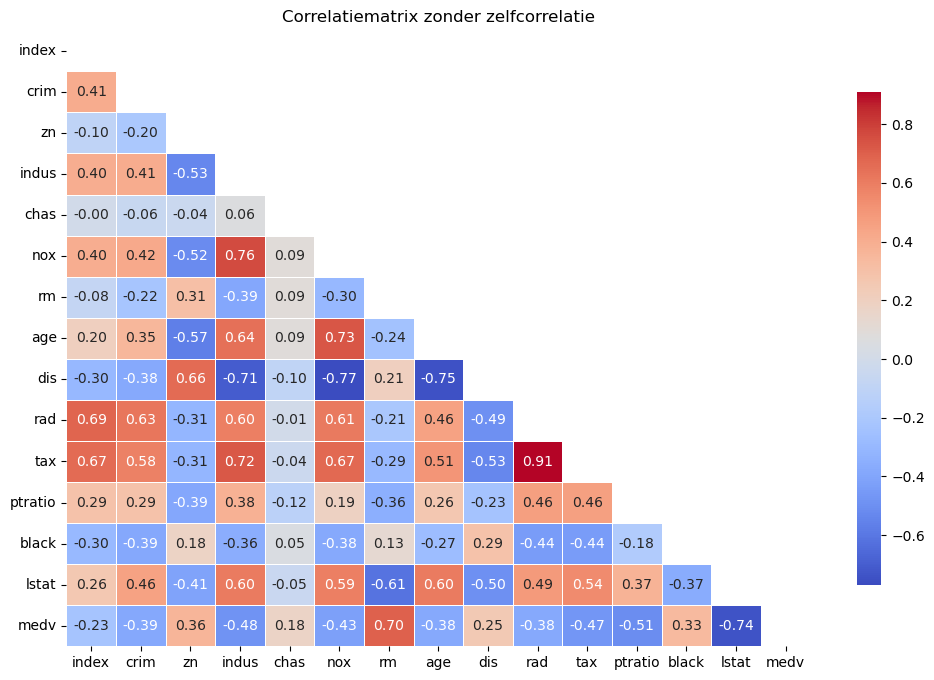

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=mask, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlatiematrix zonder zelfcorrelatie")
plt.show()

**MEDV** is de doelvariabele die we proberen te voorspellen: de mediane woningwaarde. Door een histogram en boxplot van MEDV te maken, onderzoeken we de spreiding, scheefheid en mogelijke outliers. Dit helpt ons de verdeling van de data te begrijpen en een beter voorspellend model te kiezen.

rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
index     -0.226604
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


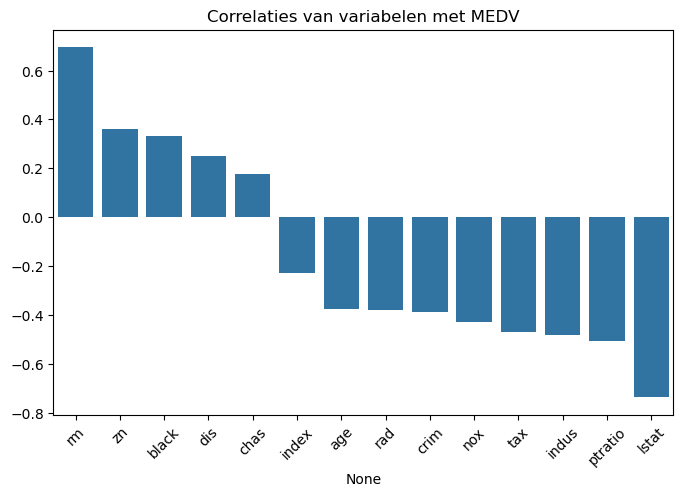

In [ ]:
correlation_with_target = df.corr()['medv'].drop('medv').sort_values(ascending=False)
print(correlation_with_target)
plt.figure(figsize=(8, 5))

sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title("Correlaties van variabelen met MEDV")
plt.xticks(rotation=45)
plt.show()


Er zijn positieve en negatieve correlaties tussen verschillende variabelen en de mediane huizenprijs (medv). Positieve correlaties, zoals die van rm (aantal kamers), zn (procent grondzone met lage status), black (percentage zwarte inwoners) en dis (afstand tot werkgelegenheid), geven aan dat een toename van deze variabelen waarschijnlijk gepaard gaat met hogere huizenprijzen. Aan de andere kant wijzen negatieve correlaties, zoals die van lstat (percentage lage status bevolking), ptratio (verhouding leerling/leraar), tax (belastingen) en indus (industriegebied), erop dat hogere waarden van deze variabelen waarschijnlijk lagere huizenprijzen betekenen.

Hieronder staat een pairplot van enkele belangrijke variabelen. 

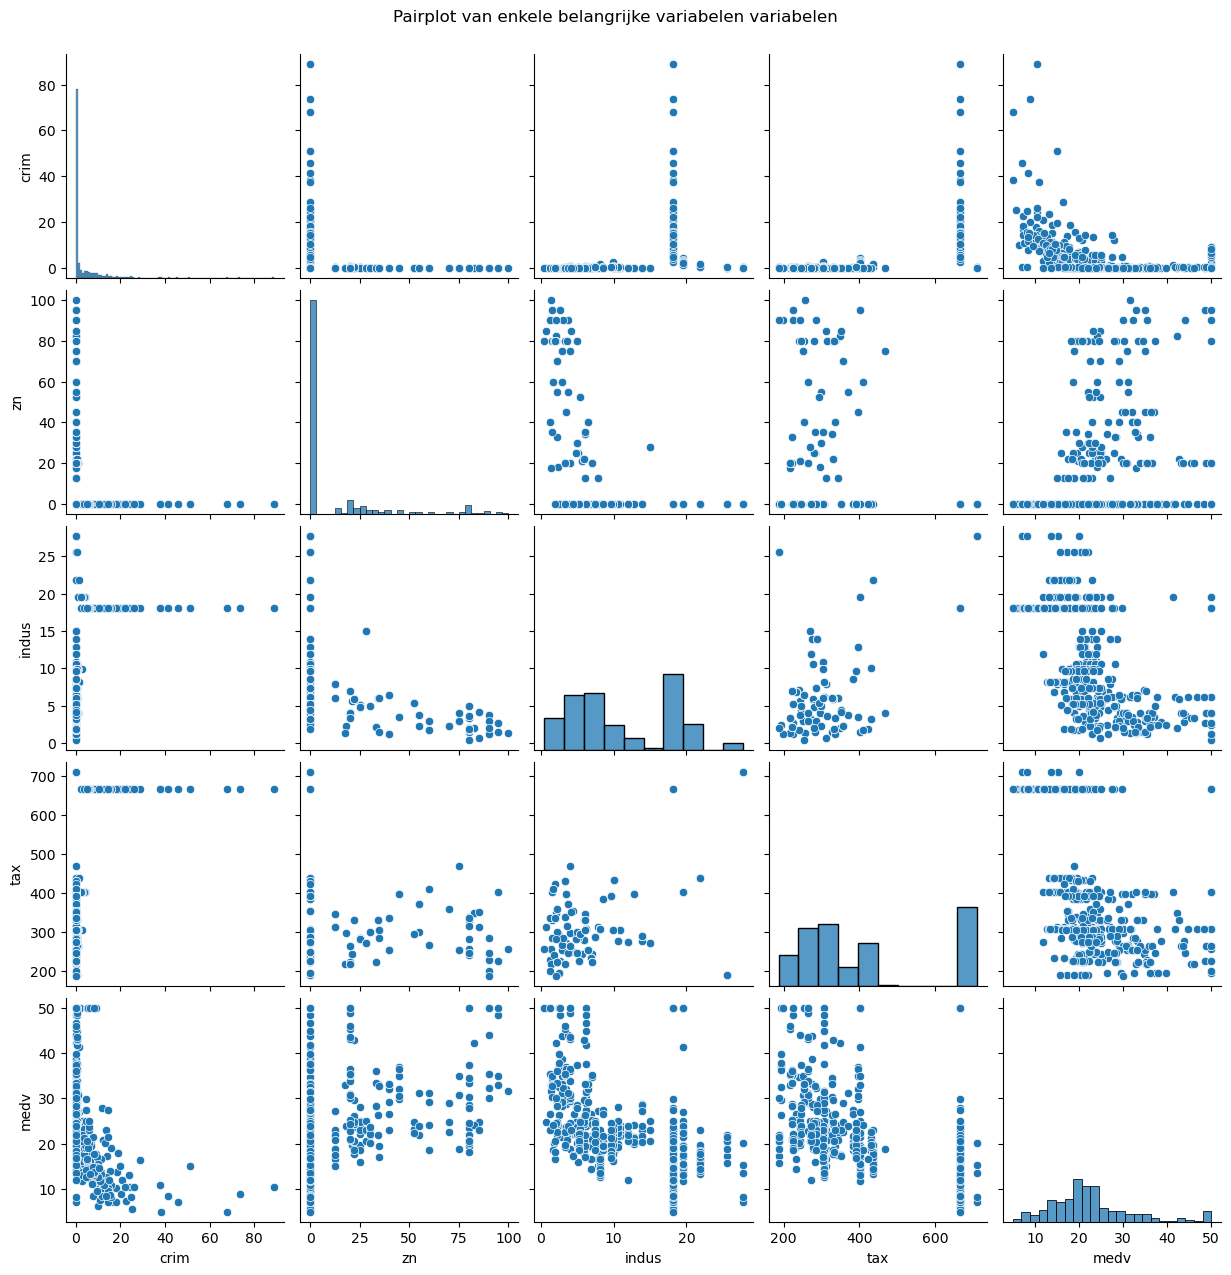

In [ ]:
sns.pairplot(df[['crim', 'zn', 'indus', 'tax', 'medv' ]])  # wegens het 'grote' aantal variabelen is het pairplot beperkt tot enkele variabelen
plt.suptitle('Pairplot van enkele belangrijke variabelen variabelen', y=1.02)
plt.show()

3. Bestudeer de verdeling van woningwaarden en andere relevante kenmerken

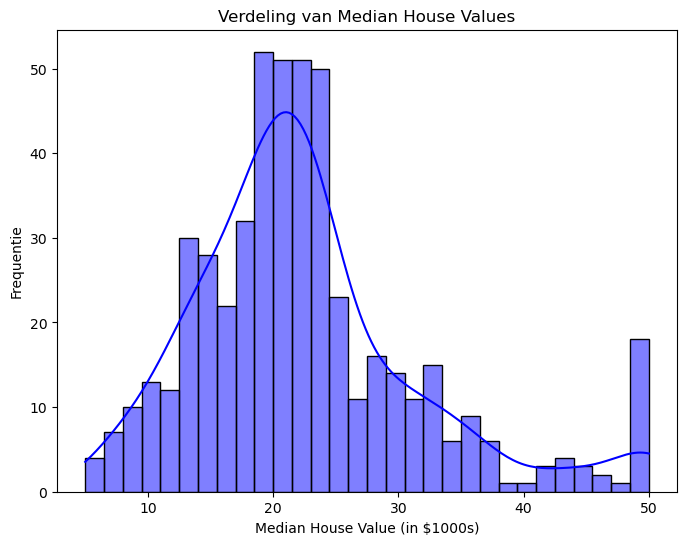

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df['medv'], bins=30, kde=True, color='blue')
plt.xlabel("Median House Value (in $1000s)")
plt.ylabel("Frequentie")
plt.title("Verdeling van Median House Values")
plt.show()

Hierna wordt de verdeling van de variabelen gevisualiseerd aan de hand van een boxplot.

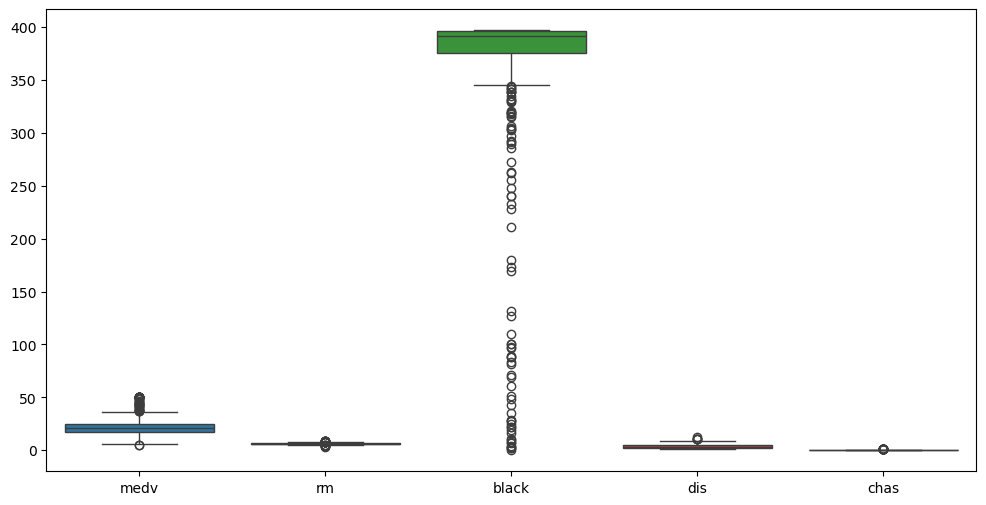

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['medv', 'rm', 'black', 'dis', 'chas']])
plt.show()

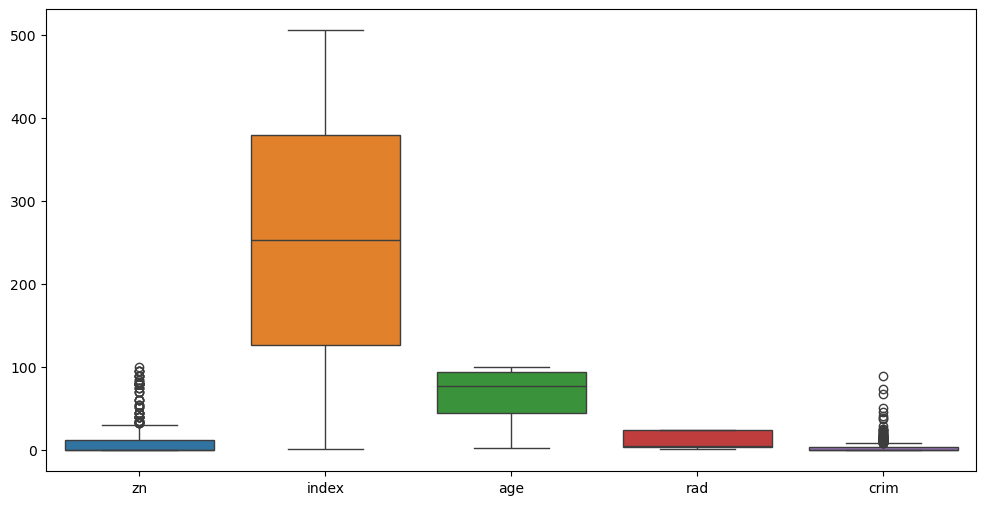

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['zn', 'index', 'age', 'rad', 'crim']])
plt.show()

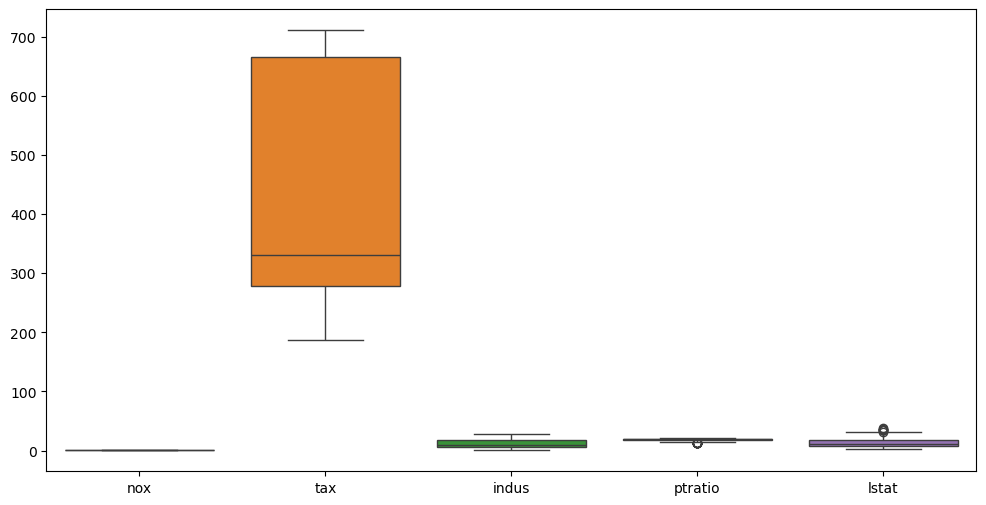

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['nox', 'tax', 'indus', 'ptratio', 'lstat']])
plt.show()

4. Data voorbereieden voor mogelijke modeleertaken

Vermits de data geen ontbrekende waareden heeft is het niet nodig om hiervoor te controleren.
Hiernaast is het handig om de uitschieters te verwijderen.

In [ ]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

Hierna wordt de verdeling van de dataset opnieuw getoond.

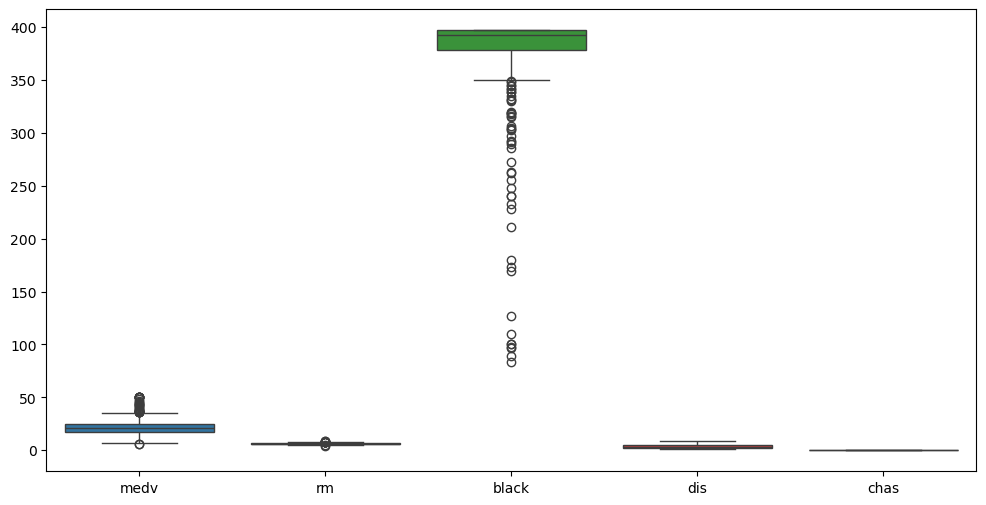

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['medv', 'rm', 'black', 'dis', 'chas']])
plt.show()

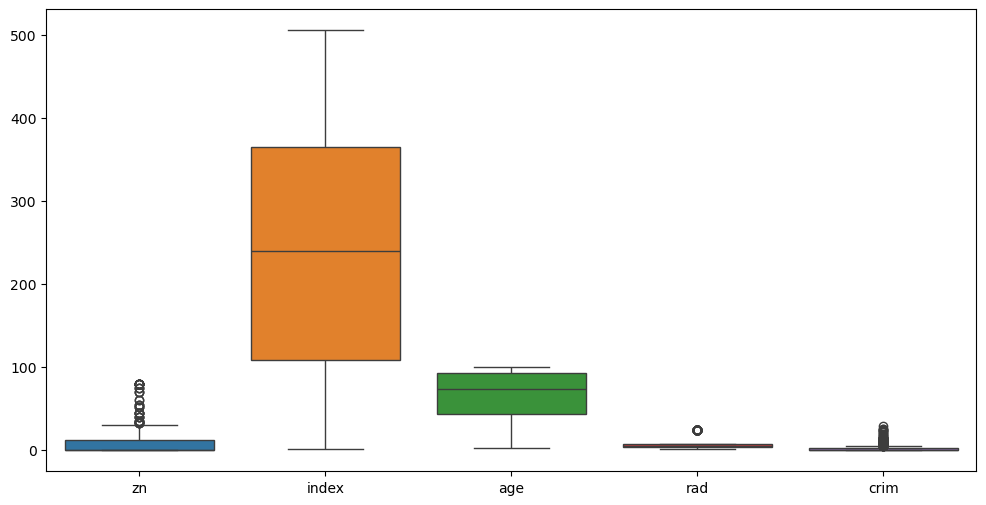

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['zn', 'index', 'age', 'rad', 'crim']])
plt.show()

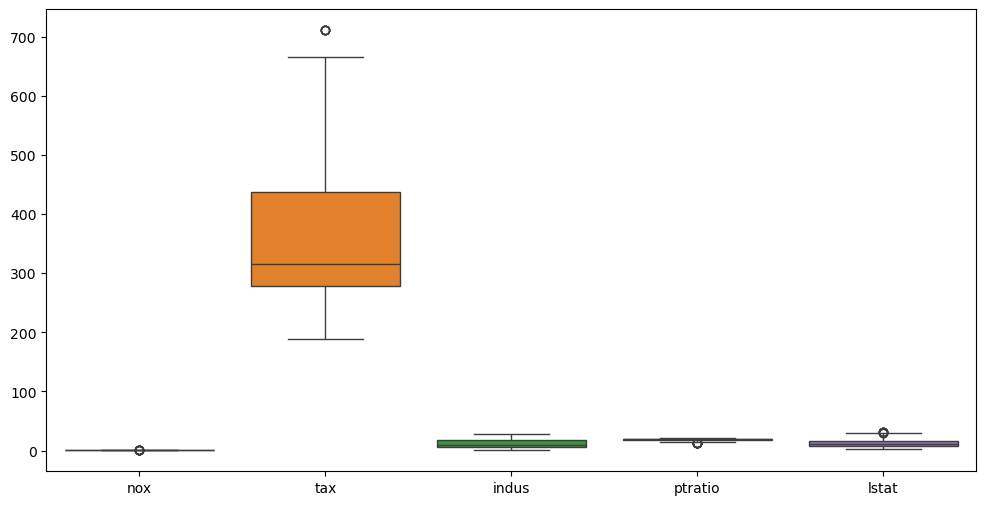

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['nox', 'tax', 'indus', 'ptratio', 'lstat']])
plt.show()

Niet alle uitschiets zijn verwijderd. Als in volgende code df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] de 3 naar een 2 veranderd wordt, gaan er minder uitschieters zijn , maar bij de dataset met weinig sprijding gaat een deel van de data verloren.

de data opsplitsen in een deel van testdata en een deel van trainingsdata.

In [ ]:
X = df.drop(columns=['medv'])  # MEDV is de doelvariabele
y = df['medv']

# Splits de dataset in een training- en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliseer de numerieke variabelen
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


5. visualistaite van de training/test dataset

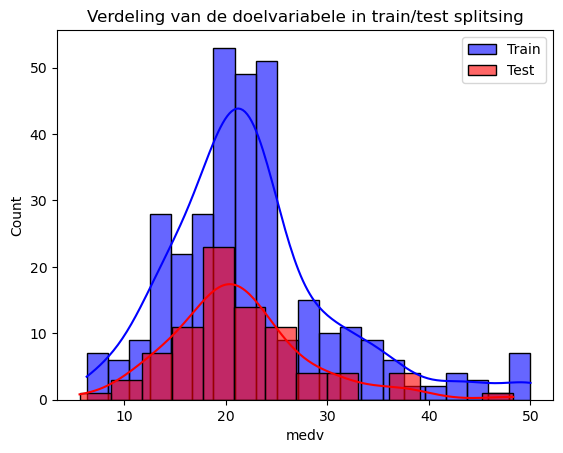

In [ ]:
sns.histplot(y_train, kde=True, color='blue', label="Train", alpha=0.6)
sns.histplot(y_test, kde=True, color='red', label="Test", alpha=0.6)
plt.legend()
plt.title("Verdeling van de doelvariabele in train/test splitsing")
plt.show()

Zoals er te zien is, is de verdeling van de test en training data ongeveer gelijkmatig gebeurt. De dataset van de testset is kleiner waardoor de verdeling van de uitshcieters een beetje anders is. Dit heeft normaal geen negatief effect.